

# Projet : Analyser l'efficacité des équipes dans le football européen 

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 
 L’analyse des données aussi appelée analyse exploratoire des données est une famille de méthodes statistiques dont les principales caractéristiques sont d'être multidimensionnelles et descriptives.la terminologie « analyse des données » désigne donc un sous-ensemble de ce qui est appelé plus généralement la statistique multivariée. Certaines méthodes, pour la plupart géométriques, aident à faire ressortir les relations pouvant exister entre les différentes données et à en tirer une information statistique qui permet de décrire de façon plus succincte les principales informations contenues dans ces données. D'autres techniques permettent de regrouper les données de façon à faire apparaître clairement ce qui les rend homogènes, et ainsi mieux les connaître.
 
Nous disposons d'une base de données de football qui provient de Kaggle. Il contient des données pour les matchs de football, les joueurs et les équipes de plusieurs pays européens de 2008 à 2016. Cet ensemble de données est assez vaste, j’étudie l’ensemble de données Soccer. Principalement, l’ensemble de données a 7 tables appelées « Pays », « Ligue », « Match », « Joueur », « Attributs du joueur », « Équipe » et « Attributs de l’équipe ».

                                         Lignes   Colonnes 
                    Country	              11	    2
                    League	              11 	    3
                    Match	            25979	   115
                    Player       	    11060	    7
                    Player_Attributes	183978     42
                    Team	             299	    5
                    Team_Attributes	    1458	   25

l’ensemble de données contient des données utiles sur 11 saisons entre 2008 et 2016 dans différentes ligues et une liste des attributs (joueurs, équipes).Les Événements de match détaillés (types de buts, possession, corner, croix, fautes, cartes etc...) Chaque enregistrement a sa table reliée à l’autre par des numéros d’identification. le tableau du joueur décrit les noms des joueurs ainsi que leur poids et leur taille. Les attributs des joueurs décrivent leurs capacités et évaluent leur potentiel.

SQL est un langage conceptuel permettant d’utiliser des données stockées dans des bases de données. Dans notre cas, SQLite est l’implémentation spécifique.Le composant le plus important de la base de données etant les diffetrents tables,c’est là que toutes les données sont stockées. Habituellement, les données sont divisées en plusieurs tables et ne sont pas stockées au même endroit mais ici nous avons une seule base de données.




#### Questions

D’après mon enquête préliminaire, compte tenu de cette base de données, il pourrait être intéressant d’examiner les questions suivantes:

        1) Comment le nombre de buts marqués est-il réparti? Comment évolue-t-il ?
        2) Les 5 meilleures équipes efficaces avec une moyenne de points par match?
        3) En quoi les attributs des joueurs diffèrent-ils pour les équipes les plus efficaces par rapport au reste des équipes?
        4) Home and away goals by league?
        5) Comment est réparti les buts à domicile et à l'exterieur?
        6) Quels joueurs ont eu le plus de pénalités?
        7) Comment le nombre de buts marqués est-il réparti ? Comment évolue-t-il ?
        8) Quelles équipes ont marqué le plus ?
        9) Le football européen est-il devenu plus ou moins équilibré ?
        10) Y a-t-il des preuves de l’avantage de la maison?


In [1]:
# Importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

<a id='wrangling'></a>
## Data Wrangling


### Tout d’abord, nous allons créer la connexion à la base de données et voir quelles tables nous avons


In [2]:
#Connexion avec la base de données et les tables disponibles 
q = sqlite3.connect('database.sqlite')
tables = pd.read_sql("""SELECT name FROM sqlite_master  WHERE type='table';""", q)
tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


### 
   
     Importation des differentes tables 

In [3]:
# Importer le dataset
with sqlite3.connect('database.sqlite') as q:
    df_countries = pd.read_sql_query("SELECT * from Country", q)
    df_team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",q)
    df_matches = pd.read_sql_query("SELECT * from Match", q)
    df_player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",q)
    df_teams = pd.read_sql_query("SELECT * from Team", q)
    df_player = pd.read_sql_query("SELECT * from Player",q)
    df_leagues = pd.read_sql_query("SELECT * from League", q)
    df_sequence = pd.read_sql_query("SELECT * from sqlite_sequence",q)
   


In [4]:
df_matche=df_matches.copy()
df_team= df_teams.copy()
df_players=df_player.copy()

In [5]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [6]:
df_countries.head(3)

,id,name
0,1,Belgium
1,1729,England
2,4769,France


In [7]:
df_team_attributes.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [8]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

### 

La colonne buildUpPlayDribbling a  des valeurs manquantes 

In [9]:
 df_matches.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [10]:
 df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [11]:
df_player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [12]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [13]:
 df_teams.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [14]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


### 
    On a 299 équipes. la variable team_fifa_api_id n'est pas egale à 299 comme les autres (soit il y a des doublons, soit il y a des données manquante)

In [15]:
df_player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [16]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [17]:
df_leagues.head(3)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1


In [18]:
df_leagues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [19]:
df_sequence.head(3)

,name,seq
0,Team,103916
1,Country,51958
2,League,51958


In [20]:
df_sequence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7 non-null      object
 1   seq     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [21]:
df_countries.describe() 

,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


In [22]:
df_matches.describe() 

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [23]:
df_player_attributes.describe() 

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [24]:
df_teams.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


In [25]:
df_player.describe() 

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [26]:
df_sequence.describe()

,seq
count,7.000000
mean,65185.857143
std,62082.942398
min,1458.000000
25%,31516.500000
50%,51958.000000
75%,77937.000000
max,183978.000000


In [27]:
df_leagues.describe() 

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


In [28]:
df_team_attributes.describe() 

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [29]:
df_countries.isnull().sum() 

id      0
name    0
dtype: int64

In [30]:
df_team_attributes.isnull().sum() 

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [31]:
df_team_attributes['buildUpPlayDribbling'].describe()

count    489.000000
mean      48.607362
std        9.678290
min       24.000000
25%       42.000000
50%       49.000000
75%       55.000000
max       77.000000
Name: buildUpPlayDribbling, dtype: float64


             Pret de 969/1458=67% sont manquante dans buildUpPlayDribbling 
             
             Nous pouvons compenser les valeurs Null dans la colonne buildUpPlayDribbling en changeant les valeurs Null à la valeur moyenne de 48.60.

In [32]:
df_team_attributes['buildUpPlayDribbling'].fillna(48.60, inplace=True)

In [33]:
df_team_attributes.isnull().sum()

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

### 

Tout va bien!!!

In [34]:
df_matches.isnull().sum() 

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [35]:
df_player_attributes.isnull().sum() 

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

### 
Tellement de valeurs nulles pour cette base de données. Que faire?????????

In [36]:
df_teams.isnull().sum() 

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

### 

team_fifa_api_id  a des valeurs manquantes comme signaler plus haut

In [37]:
df_player.isnull().sum() 

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [38]:
df_leagues.isnull().sum() 

id            0
country_id    0
name          0
dtype: int64

In [39]:
df_sequence.isnull().sum()

name    0
seq     0
dtype: int64

In [40]:
df_countries.shape 

(11, 2)

In [41]:
df_team_attributes.shape 

(1458, 25)

In [42]:
df_matches.shape

(25979, 115)

In [43]:
df_player_attributes.shape

(183978, 42)

In [44]:
df_teams.shape 

(299, 5)

In [45]:
df_player.shape

(11060, 7)

In [46]:
df_leagues.shape

(11, 3)

In [47]:
df_sequence.shape 

(7, 2)

### Duplications

In [48]:
df_countries.duplicated().sum() 

0

In [49]:
df_team_attributes.duplicated().sum()

0

In [50]:
df_matches.duplicated().sum()

0

In [51]:
df_player_attributes.duplicated().sum() 

0

In [52]:
df_teams.duplicated().sum() 

0

In [53]:
df_player.duplicated().sum() 

0

In [54]:
df_leagues.duplicated().sum() 

0

In [55]:
df_sequence.duplicated().sum() 

0

### Resumé des premiers observations

la table matches:
     
     Contient 25979 enregistrements et 115 colonnes sans doublons  et avec des valeurs manquantes (407395) et les valeurs nulles dans les colonnes dont je n'ai pas besoin dans les processus. 

La table countries:

    Contient 11 enregistrements et 2 colonnes,sans  doublons , Aucune valeur manquante. 

La table teams:

    Contient 299 enregistrements et 5 colonnes, pas de doublons  
    A des valeurs manquantes (11) mais toutes les valeurs sont nulles dans la colonne team_fifa_api_id.

La table team attributes.:

    Contient 1458 enregistrements et 25 colonnes,sans doublons
    A beaucoup de valeurs manquantes (969) mais toutes les valeurs nulles dans la colonne buildUpPlayDribbling, donc je vais l'abandonner.

La table leagues:

    Contient 11 enregistrements et 3 colonnes.
    Aucun enregistrement en double 
    Aucune valeur manquante. 

La table player attributes:

    Contient 183973 enregistrements et 42 colonnes.
    Aucun enregistrement en double 
    A beaucoup de valeurs manquantes (47301).



array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'country_id'}>,
        <AxesSubplot:title={'center':'league_id'}>,
        <AxesSubplot:title={'center':'stage'}>,
        <AxesSubplot:title={'center':'match_api_id'}>,
        <AxesSubplot:title={'center':'home_team_api_id'}>,
        <AxesSubplot:title={'center':'away_team_api_id'}>,
        <AxesSubplot:title={'center':'home_team_goal'}>,
        <AxesSubplot:title={'center':'away_team_goal'}>,
        <AxesSubplot:title={'center':'home_player_X1'}>],
       [<AxesSubplot:title={'center':'home_player_X2'}>,
        <AxesSubplot:title={'center':'home_player_X3'}>,
        <AxesSubplot:title={'center':'home_player_X4'}>,
        <AxesSubplot:title={'center':'home_player_X5'}>,
        <AxesSubplot:title={'center':'home_player_X6'}>,
        <AxesSubplot:title={'center':'home_player_X7'}>,
        <AxesSubplot:title={'center':'home_player_X8'}>,
        <AxesSubplot:title={'center':'home_player_X9'}>,
 

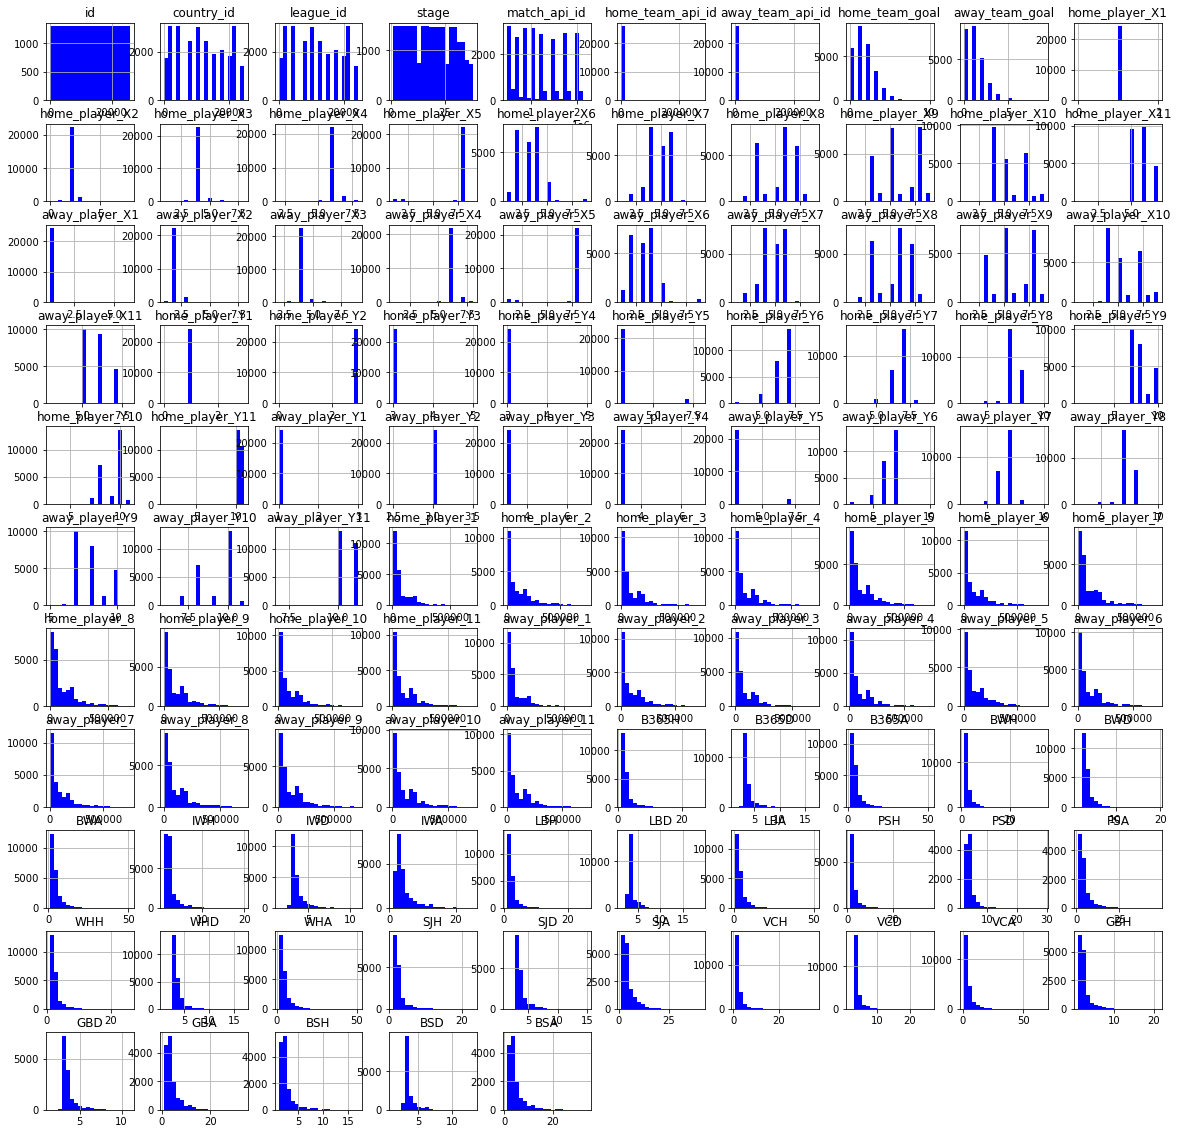

In [56]:
 df_matches.hist(bins=20,figsize=(20,20), color = 'b')

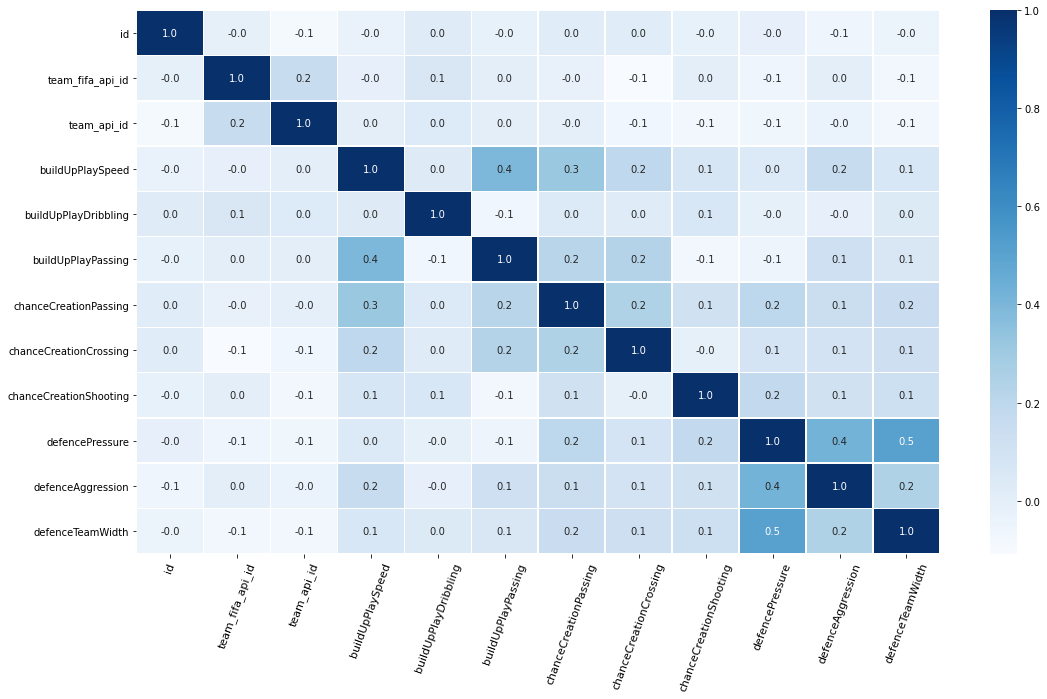

In [57]:
#correlation map
f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap( df_team_attributes.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

### 1) Nettoyage des données de la table Matches

### 
           
           -Fusionnons les deux bases  df_matches et df_leagues, df_matches et df_teams et  df_matches et df_countries

           -Supprimer les colonnes qui ne sont pas pertinentes pour l’analyse.
           
           -Sélectionner les colonnes dont nous avons besoin dans l'analyse,Convertisons les colonnes les colonnes qu'ils faut pour avoir un bon dataFrame  

In [58]:
df_matches=df_matches.loc[:,:'away_team_goal'] 
df_matches['date'] = pd.to_datetime(df_matches['date'])
df_matches['season_year'] = df_matches['date'].dt.year
str(df_matches['season_year'].min()) + " : " + str(df_matches['season_year'].max())

'2008 : 2016'

In [59]:
df_countries.rename(columns={'name' : 'country_name', }, inplace=True)
df_matches = df_matches.merge(df_countries, how='inner', left_on= "country_id", right_on = "id")
df_matches.drop(columns=['id_y'], inplace=True)
df_matches.rename(columns={'id_x' : 'id'}, inplace=True)
df_matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_year,country_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,Belgium
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,2008,Belgium
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,2008,Belgium
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,2008,Belgium


### 2) Nettoyage des données de la table player

### 

    joindre la table df_player avec df_player_attribute table ,en suite supprimons les valeurs doublé et manaquantes 

In [60]:
df_player = df_player.merge(df_player_attributes, on=['player_api_id','player_fifa_api_id'], how = "inner")
df_player.rename(columns={'id_x' : 'id'}, inplace=True)
df_player.drop(columns=["id_y","player_api_id" , "player_fifa_api_id"], inplace=True)
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183766 entries, 0 to 183765
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183766 non-null  int64  
 1   player_name          183766 non-null  object 
 2   birthday             183766 non-null  object 
 3   height               183766 non-null  float64
 4   weight               183766 non-null  int64  
 5   date                 183766 non-null  object 
 6   overall_rating       183016 non-null  float64
 7   potential            183016 non-null  float64
 8   preferred_foot       183016 non-null  object 
 9   attacking_work_rate  180622 non-null  object 
 10  defensive_work_rate  183016 non-null  object 
 11  crossing             183016 non-null  float64
 12  finishing            183016 non-null  float64
 13  heading_accuracy     183016 non-null  float64
 14  short_passing        183016 non-null  float64
 15  volleys          

In [61]:
df_player.drop_duplicates(inplace = True)
df_player.dropna(inplace=True)
df_player.isna().sum().sum()

0

### 3) Nettoyage des données de la table Teams
Nous allons supprimer la colonnes buildUpPlayDribbling qui a le plus de valeurs manquées dans la table teams,et faisons quelques ajustement.

In [62]:
df_team_attributes.drop(columns=['buildUpPlayDribbling'], axis=1, inplace=True)
df_teams = df_teams.merge(df_team_attributes , on = ['team_api_id','team_fifa_api_id'], how = 'inner')
df_teams.drop(columns=["id_y","team_api_id" , "team_fifa_api_id","team_short_name"], inplace=True)
df_teams.rename(columns={'id_x': 'id'}, inplace=True)
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180228 entries, 0 to 183765
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180228 non-null  int64  
 1   player_name          180228 non-null  object 
 2   birthday             180228 non-null  object 
 3   height               180228 non-null  float64
 4   weight               180228 non-null  int64  
 5   date                 180228 non-null  object 
 6   overall_rating       180228 non-null  float64
 7   potential            180228 non-null  float64
 8   preferred_foot       180228 non-null  object 
 9   attacking_work_rate  180228 non-null  object 
 10  defensive_work_rate  180228 non-null  object 
 11  crossing             180228 non-null  float64
 12  finishing            180228 non-null  float64
 13  heading_accuracy     180228 non-null  float64
 14  short_passing        180228 non-null  float64
 15  volleys          

### 

   Ajouter de nouvelles colonnes aux années de magasin de table d’équipe

In [63]:
#convert date to datatime type to get year easily
df_teams['date'] = pd.to_datetime(df_teams['date']) 
df_teams['year'] = df_teams['date'].dt.year
df_teams.dropna(inplace=True)
## Drop duplicated records
df_teams.drop_duplicates(inplace = True)
df_teams.describe()

,id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,year
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,22708.422787,52.463967,48.489362,52.166781,53.734386,53.971860,46.017845,49.253946,52.187371,2012.505148
std,15008.544877,11.549653,10.899771,10.364195,11.090171,10.330588,10.230702,9.740734,9.577828,1.708538
min,1.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,2010.000000
25%,9548.000000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000,2011.000000
50%,20525.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000,2013.000000
75%,35294.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000,2014.000000
max,50204.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000,2015.000000


In [64]:
#Check Missed valuse befor start analysis
df_teams.isna().sum().sum()

0


<a id='eda'></a>
## L'analyse exploratoire des données


###   Question de recherche 1: Comment le nombre de buts marqués est-il réparti? Comment évolue-t-il ?

        Comme mesure de la compétitivité, il a été choisi la différence des buts marqués par les deux équipes. Si cette différence est faible, le match est supposé être plus équilibré. Par conséquent, si une ligue affiche une faible différence de buts pour chaque match, elle est supposée être plus équilibrée et imprévisible.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Comment la variable goal_sum évolue-t-elle dans le temps ?')

<Figure size 864x432 with 0 Axes>

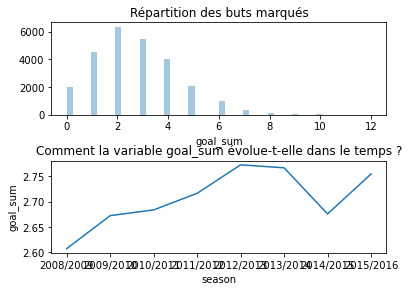

In [65]:
# somme des buts marqués à chaque match.
df_matches['goal_sum']=df_matches['home_team_goal']+df_matches['away_team_goal']

#Tracez la distribution de goal_sum et son évolution sur la période considérée.
plt.figure(figsize=(12,6))
figure, axes = plt.subplots(2, 1)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
sns.distplot(df_matches['goal_sum'], kde=False, ax=axes[0]).set_title('Répartition des buts marqués')
sns.lineplot(x='season',y='goal_sum',data=df_matches, err_style=None, ax=axes[1]).set_title('Comment la variable goal_sum évolue-t-elle dans le temps ?')

### 
      La distribution de goal_sum est positivement faussée et la moyenne est de 2,7. Cela signifie qu’en moyenne, au cours des saisons 2008-2016, pour chaque match, 2,7 buts ont été marqués.

        La variable goal_sum suit une tendance à la hausse, ce qui signifie que le nombre de buts marqués au cours de la période analysée a augmenté.

### Question de recherche 2 :Les 5 meilleures équipes efficaces avec une moyenne de points par match?


    Je vais commencer par les matchs et donner des points à chaque équipe pour chaque match en fonction du résultat du match : 
    
    3 points pour la victoire, 
    1 point pour le match nul,
    0 point pour la défaite.
    
    Je vais additionner les points pour chaque équipe par saison. Calculez ensuite l’écart min, max et type pour chaque équipe sur toutes les saisons et sélectionnez les 5 meilleures équipes efficaces.


In [66]:
df_matchscores = pd.read_sql_query(
    "SELECT id, country_id, league_id, season, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal FROM Match;", q)
df_matchscores.head()

,id,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,492473,9987,9993,1,1
1,2,1,1,2008/2009,492474,10000,9994,0,0
2,3,1,1,2008/2009,492475,9984,8635,0,3
3,4,1,1,2008/2009,492476,9991,9998,5,0
4,5,1,1,2008/2009,492477,7947,9985,1,3


In [67]:
def Points(data,var1,var2,var3,var4):
    
    #data.assign(var3="",var4="")
    
    for i in range (len(data)):
        
        if ((data[var1][i]-data[var2][i])>0):
            data[var4][i]=3
            data[var3][i]=0            
            i=i+1       

            
        elif ((data[var1][i]-data[var2][i])<0):
            data[var4][i]=0
            data[var3][i]=3
            i=i+1
                        
        else:
            data[var4][i]=1 
            data[var3][i]=1           
            i=i+1

In [68]:
df_matchscores=df_matchscores.assign(points_away_team="",points_home_team="")
Points(df_matchscores,'home_team_goal','away_team_goal','points_away_team','points_home_team')
df_points_season_home = df_matchscores.groupby(['home_team_api_id', 'season'])['points_home_team'].agg(['sum','count']).reset_index()
df_points_season_home.columns = ['team_api_id', 'season', 'points', 'matches']
df_points_season_home.head()

<ipython-input-67-043565115fca>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var4][i]=1
<ipython-input-67-043565115fca>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var3][i]=1
<ipython-input-67-043565115fca>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var4][i]=0
<ipython-input-67-043565115fca>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

,team_api_id,season,points,matches
0,1601,2008/2009,21,15
1,1601,2009/2010,32,15
2,1601,2010/2011,23,15
3,1601,2011/2012,30,15
4,1601,2012/2013,17,15




### 
    -Joindre les deux bases de données (df_points_season_both et df_points_season_home)
    et additionner les points des matchs pour chaque équipe en tant que home_team et away_team
    -Ajoutez une colonne "points par match" pour calculer la moyenne des points par match.
    -Ajoutez des colonnes pour les dates de début et de fin de saison en supposant que les saisons commencent le 1er juillet et se terminent le 30 juin. Nous aurons besoin de ces colonnes pour comparer avec les attributs de l'équipe plus tard.
    -Fusionner avec le cadre de données de l'équipe pour ajouter des noms aux équipes.
    -Tri décroissant par points_par_matchs


In [71]:
df_points_season_home = df_matchscores.groupby(['home_team_api_id', 'season'])['points_home_team'].agg(['sum','count']).reset_index()
df_points_season_home.columns = ['team_api_id', 'season', 'points', 'matches']
df_points_season_home.head()

,team_api_id,season,points,matches
0,1601,2008/2009,21,15
1,1601,2009/2010,32,15
2,1601,2010/2011,23,15
3,1601,2011/2012,30,15
4,1601,2012/2013,17,15


In [72]:
#sum points for away_team
df_points_season_away = df_matchscores.groupby(['away_team_api_id', 'season'])['points_away_team'].agg(['sum','count']).reset_index()
#rename columns
df_points_season_away.columns = ['team_api_id', 'season', 'points', 'matches']
df_points_season_away.head()

,team_api_id,season,points,matches
0,1601,2008/2009,13,15
1,1601,2009/2010,21,15
2,1601,2010/2011,15,15
3,1601,2011/2012,25,15
4,1601,2012/2013,14,15


In [73]:
df_points_season_both = pd.concat([df_points_season_home, df_points_season_away])
df_team_season_points = df_points_season_both.groupby(['team_api_id', 'season']).sum().reset_index()
df_team_season_points['points_per_match'] = df_team_season_points['points']/df_team_season_points['matches']
df_team_season_points['seasonstart'] = df_team_season_points['season'].str[:4] + '-07-01'
df_team_season_points['seasonend'] = df_team_season_points['season'].str[5:] + '-06-30'
df_teamname_season_points = pd.merge(df_team[['team_api_id', 'team_long_name']] , df_team_season_points, how='right', on='team_api_id')
df_teamname_season_points.sort_values(by='points_per_match', ascending=False).head(10)

,team_api_id,team_long_name,season,points,matches,points_per_match,seasonstart,seasonend
807,9773,FC Porto,2010/2011,84,30,2.800000,2010-07-01,2011-06-30
1057,9885,Juventus,2013/2014,102,38,2.684211,2013-07-01,2014-06-30
894,9823,FC Bayern Munich,2012/2013,91,34,2.676471,2012-07-01,2013-06-30
895,9823,FC Bayern Munich,2013/2014,90,34,2.647059,2013-07-01,2014-06-30
607,8633,Real Madrid CF,2011/2012,100,38,2.631579,2011-07-01,2012-06-30
616,8634,FC Barcelona,2012/2013,100,38,2.631579,2012-07-01,2013-06-30
1107,9925,Celtic,2013/2014,99,38,2.605263,2013-07-01,2014-06-30
613,8634,FC Barcelona,2009/2010,99,38,2.605263,2009-07-01,2010-06-30
809,9773,FC Porto,2012/2013,78,30,2.600000,2012-07-01,2013-06-30
649,8640,PSV,2014/2015,88,34,2.588235,2014-07-01,2015-06-30


In [74]:
df_teamname_season_points.sort_values(by='points_per_match', ascending=False).head(10)

,team_api_id,team_long_name,season,points,matches,points_per_match,seasonstart,seasonend
807,9773,FC Porto,2010/2011,84,30,2.800000,2010-07-01,2011-06-30
1057,9885,Juventus,2013/2014,102,38,2.684211,2013-07-01,2014-06-30
894,9823,FC Bayern Munich,2012/2013,91,34,2.676471,2012-07-01,2013-06-30
895,9823,FC Bayern Munich,2013/2014,90,34,2.647059,2013-07-01,2014-06-30
607,8633,Real Madrid CF,2011/2012,100,38,2.631579,2011-07-01,2012-06-30
616,8634,FC Barcelona,2012/2013,100,38,2.631579,2012-07-01,2013-06-30
1107,9925,Celtic,2013/2014,99,38,2.605263,2013-07-01,2014-06-30
613,8634,FC Barcelona,2009/2010,99,38,2.605263,2009-07-01,2010-06-30
809,9773,FC Porto,2012/2013,78,30,2.600000,2012-07-01,2013-06-30
649,8640,PSV,2014/2015,88,34,2.588235,2014-07-01,2015-06-30



###  
Les 5 meilleures équipes efficaces avec une moyenne de points par match:

    FC Porto 2010/2011 (2.800000)
    Juventus 2013/2014 (2.684211)
    FC Bayern Munich 2012/2013 (2.676471)
    FC Bayern Munich 2013/2014 (2.647059)
    FC Barcelone 2012/2013 (2.631579) 
    Real Madrid CF 2011/2012 (2.631579)



### Question de recherche 3 : En quoi les attributs des joueurs diffèrent-ils pour les équipes les plus efficaces par rapport au reste des équipes?

    Maintenant que nous avons étudié les attributs de l’équipe, nous allons examiner les attributs des joueurs pour les équipes. Nous sommes intéressés si les attributs des joueurs pour une équipe ont une corrélation avec l’efficacité (gagner des matchs) d’une équipe.

    Pour étudier cela, nous devrons filtrer les joueurs des  meilleures équipes et comparer leurs attributs aux autres.

In [75]:
df_team_season_points[['points','matches','points_per_match']].describe(percentiles=[.1, .25, .5, .75, .9])

,points,matches,points_per_match
count,1481.000000,1481.000000,1481.000000
mean,48.170831,35.083052,1.373105
std,16.048654,3.570599,0.434623
min,4.000000,6.000000,0.441176
10%,30.000000,30.000000,0.882353
25%,37.000000,34.000000,1.078947
50%,45.000000,36.000000,1.289474
75%,57.000000,38.000000,1.631579
90%,71.000000,38.000000,2.029412
max,102.000000,38.000000,2.800000


### 
    Le top 10 a un score de 2,029412 points par match. Il serait intéressant de voir comment ces 10 équipes efficaces se comparent aux 90% restants des équipes. Par conséquent, nous allons comparer les attributs de l’équipe.

    Tout d’abord, nous devons lier df_team_season_points aux attributs d’équipe pour les 10% d’équipes les plus efficaces. Par conséquent, nous devons savoir quelles équipes sont dans ce top 10% en filtrant df_team_season_points sur le point par match supérieur à 2,029412.

In [76]:
df_team_top10 = df_team_season_points[(df_team_season_points['points_per_match'] > 2.029412)]
df_team_top10.shape

(143, 7)

### 
Sélectionnez ensuite les team_attributes pour ces équipes en filtrant sur team_api_id et la saison :

In [77]:
df_teamattr_filtered = pd.merge(df_team_top10, df_team_attributes, on='team_api_id', how='outer')                 
df_teamattr_top10 = df_teamattr_filtered.loc[df_teamattr_filtered.date.between(df_teamattr_filtered.seasonstart, df_teamattr_filtered.seasonend)]
df_teamattr_top10.describe()

,team_api_id,points,matches,points_per_match,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,9233.697248,80.422018,35.211009,2.282636,522.431193,283.733945,51.422018,43.146789,55.018349,54.844037,57.403670,52.174312,52.229358,54.229358
std,962.311901,9.977097,3.200328,0.180457,415.854506,438.860702,12.711393,10.030348,11.808645,11.764018,11.700838,11.639527,10.690627,10.366107
min,2182.000000,57.000000,28.000000,2.033333,17.000000,1.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,30.000000,30.000000
25%,8633.000000,74.000000,34.000000,2.133333,146.000000,48.000000,42.000000,35.000000,46.000000,50.000000,50.000000,45.000000,46.000000,50.000000
50%,9772.000000,81.000000,36.000000,2.263158,324.000000,231.000000,52.000000,45.000000,56.000000,56.000000,60.000000,52.000000,53.000000,55.000000
75%,9875.000000,87.000000,38.000000,2.421053,964.000000,243.000000,63.000000,52.000000,65.000000,65.000000,68.000000,60.000000,60.000000,61.000000
max,10265.000000,102.000000,38.000000,2.800000,1434.000000,1908.000000,74.000000,70.000000,77.000000,75.000000,80.000000,72.000000,71.000000,70.000000


In [78]:
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])
df_player_attributes['season'] = np.where(df_player_attributes['date'].dt.month>6, df_player_attributes['date'].dt.year.astype(str) + '/' + (df_player_attributes['date'].dt.year + 1).astype(str) , (df_player_attributes['date'].dt.year - 1).astype(str) + '/' + (df_player_attributes['date'].dt.year).astype(str))
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2014/2015
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2006/2007


### 
     La comparaison des attributs des joueurs pour les 10 meilleures équipes efficaces à toutes les équipes montre que les joueurs des 10 meilleures équipes obtiennent des scores plus élevés sur presque tous les attributs des joueurs. Les 3 principaux attributs des joueurs sur lesquels les meilleures équipes marquent le plus sont standing_tackle, sliding_tackle et dribbles. Encore une fois, les attributs liés à la défense semblent avoir une corrélation plus élevée avec l’efficacité d’une équipe.

In [79]:
#Merge country and league data
df_countries_leagues = df_countries.merge(df_leagues,left_on="id",right_on="id",how="outer")
df_countries_leagues = df_countries_leagues.drop("id",axis = 1)
df_countries_leagues = df_countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})
df_matches_new = df_matche[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

df_matches_new = df_matches_new.drop("id",axis=1)

In [80]:
#merge leauge data with match data
data = df_matches_new.merge(df_countries_leagues,left_on="country_id",right_on="country_id",how="outer")
#chech null values
data.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country_name        0
name                0
dtype: int64

**Conclusion**

### Question de recherche 2 (la repartitions des Buts à domicile et à l'extérieur par ligue ?)

In [81]:
data

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,name
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,Switzerland,Switzerland Super League
25975,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,Switzerland,Switzerland Super League
25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,Switzerland,Switzerland Super League
25977,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,Switzerland,Switzerland Super League


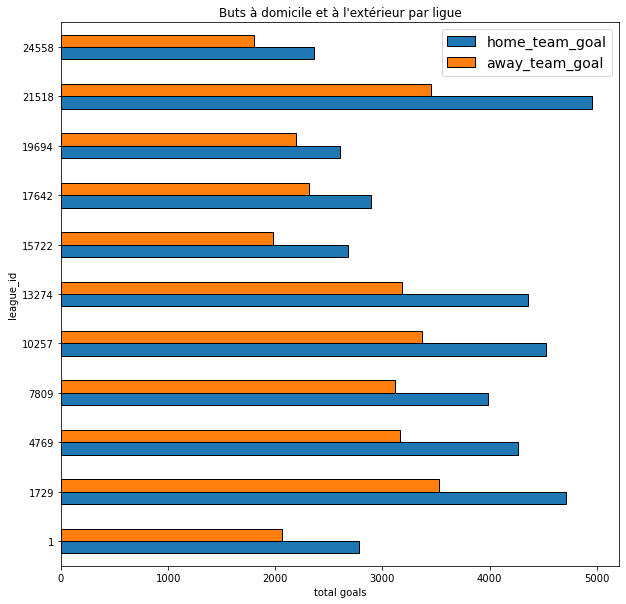

In [82]:
data.groupby("league_id").agg({"home_team_goal":"sum","away_team_goal":"sum"}).plot(kind="barh",figsize = (10,10), edgecolor = "k", linewidth =1 )
plt.title("Buts à domicile et à l'extérieur par ligue")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("total goals")
plt.show()

#converting to date format
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d")
#extracting year
data["year"] = pd.DatetimeIndex(data["date"]).year

**Conclusion** Il y a plus de buts à domicile qu'a exterieure 

### Question de recherche 4 (le nombre de matches par ligue ?)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1604: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  barfunc(barpos, self.statistic, self.width,


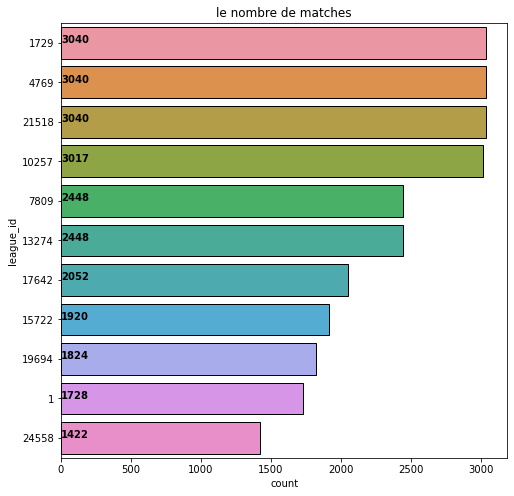

In [83]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league_id"],
                   order=data["league_id"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league_id"].nunique()
                 )
for i,j in enumerate(data["league_id"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("le nombre de matches")
plt.show()

 **Conclusion**   les league qui ont plus de matchs sont:
 
           -France league
           -Preier league
           -Liga BBVA

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of away_team_goal')

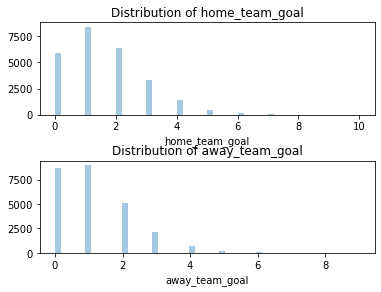

In [84]:
f, axes = plt.subplots(2, 1)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
sns.distplot(df_matches['home_team_goal'], kde=False, ax=axes[0]).set_title('Distribution of home_team_goal')
sns.distplot(df_matches['away_team_goal'], kde=False, ax=axes[1]).set_title('Distribution of away_team_goal')

### 
    En moyenne, l’équipe à domicile marque plus que l’équipe à l’extérieur. 

<a id='conclusions'></a>
## Conclusions
    Le nombre de buts marqués à chaque match avait augmenté.

    Les équipes qui ont en moyenne marqué le plus à chaque match sont :
            FC Barcelone (2,8)
            Real Madrid CF (2,8)
            FC Bayern Munich (2,4)
            PSV (2,4)
            Ajax (2,4)
    
    Les ligues européennes avec le plus de matchs sont :
       -France league
       -Preier league
       -Liga BBVA
       
    Les 5 meilleures équipes efficaces avec une moyenne de points par match:

            FC Porto 2010/2011 (2.800000)
            Juventus 2013/2014 (2.684211)
            FC Bayern Munich 2012/2013 (2.676471)
            FC Bayern Munich 2013/2014 (2.647059)
            FC Barcelone 2012/2013 (2.631579) 
            Real Madrid CF 2011/2012 (2.631579)
      En moyenne, l’équipe à domicile marque plus que l’équipe à l’extérieur

## Limitations: 
La grosse difficulté que j'ai eu c'est la comprehension des diffenretes tables pour pouvoir faire des jointure, et le temps necessaire pour repondre aux autres question.

### Reference:
-Kaggle et mes anciens projets de ma precedente formation à ESSFAR